In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    #for value in list1:

    return lst3

#input una dataframe output density dataframe de distribuciones
#data: Pandas dataframe
# x_ax: the column witch contains the main random variable
# frequency=True: True if you only need to count the number of times, False if volume is need 
# y_ax=None, 
# bins=100
def distribution_df(data,x_ax,frequency=True,y_ax=None, bins=100):
    data=data.round(6)
    minimo=data[x_ax].min()
    maximo=data[x_ax].max()
    rango=maximo-minimo
    interval_size=rango/bins
    Ranges=[]
    #Index_DF lista con el punto medio del intervalo de frequencia
    #Index_DF=[]
    dist_data=[]
    
    for k in range(bins+1):    
        Ranges.append(round(minimo+k*interval_size,7))
        #Index_DF.append(round(minimo+(2*k+1)*interval_size/2,7))
    count=1
    for i in Ranges:  
        #a=set(data[i<=data]).intersection(set(data[data<(i+count*interval_size)]))
        if count==bins:
            # a=intersection(data[i<=data[x_ax]][x_ax].tolist(),data[data[x_ax]<=(i+interval_size)][x_ax].tolist())
            a=data[i<=data[x_ax]][data[x_ax]<=(i+interval_size)]
        else:
            # a=intersection(data[i<=data[x_ax]][x_ax].tolist(),data[data[x_ax]<(i+interval_size)].tolist())
            a=data[i<=data[x_ax]][data[x_ax]<(i+interval_size)]
        # a=list(a)

        if frequency==True:
            dist_data.append(len(a))
            count+=1
        elif frequency!=True:
            dist_data.append(a[y_ax].sum())
            count+=1
    

    dist=pd.DataFrame({"Index":Ranges,f"Frequencia {y_ax}":dist_data})
    dist[f"Frequencia {y_ax} relativa"]=dist[f"Frequencia {y_ax}"]/np.sum(dist_data)
    dist["Interval Size"]=interval_size
    dist["V*P"]=dist[f"Frequencia {y_ax} relativa"]*dist["Index"]
    dist["V*P^2"]=dist[f"Frequencia {y_ax} relativa"]*dist["Index"]**2

    return dist

def frequency_inside(inf,sup,dist_df):
    
    df=dist_df[dist_df["Index"]>inf][dist_df["Index"]<sup]
    Fr=df.iloc[:,2]
    return Fr.sum() 



In [3]:
#2015 s42 
S_2015W42=pd.read_excel("2015/2015W42..xlsx",index_col=0)
S_2015W41=S_2015W41.drop(columns=["Custom"])
S_2015W41["RR ratio"]=S_2015W41["TpFactor"]/S_2015W41["SlFactor"]
S_2015W41["Profit %"]=(S_2015W41["Profit"]/10000)*100





,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Equity DD %,Trades,SlFactor,TpFactor,atrPeriod,delta,option,fastEmaPeriod,slowEMAPeriod,vwapZoneMultiplyer,RR ratio,Profit %
Pass,,,,,,,,,,,,,,,,,,
4399,5.33,4221.45,84.429000,6.484539,5.331191,21.627113,6.8626,50,3.7,6.7,23,0.02,1,4,14,2,1.810811,42.2145
4379,5.33,4221.45,84.429000,6.484539,5.331191,21.627113,6.8626,50,3.7,6.7,23,0.02,1,3,13,2,1.810811,42.2145
4377,5.33,4221.45,84.429000,6.484539,5.331191,21.627113,6.8626,50,3.7,6.7,23,0.02,1,4,11,2,1.810811,42.2145
4344,5.33,4221.45,84.429000,6.484539,5.331191,21.627113,6.8626,50,3.7,6.7,23,0.02,1,4,13,2,1.810811,42.2145
4338,5.33,4221.45,84.429000,6.484539,5.331191,21.627113,6.8626,50,3.7,6.7,23,0.02,1,5,10,2,1.810811,42.2145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,-0.94,-3831.17,-16.442790,0.646614,-0.941155,-5.000000,40.4359,233,0.5,0.5,14,0.00,1,7,14,2,1.000000,-38.3117
799,-0.94,-3831.17,-16.442790,0.646614,-0.941155,-5.000000,40.4359,233,0.5,0.5,14,0.00,0,7,17,2,1.000000,-38.3117
574,-0.94,-3831.17,-16.442790,0.646614,-0.941155,-5.000000,40.4359,233,0.5,0.5,14,0.00,0,8,11,2,1.000000,-38.3117


In [4]:
S_2015W41.columns

Index(['Result', 'Profit', 'Expected Payoff', 'Profit Factor',
       'Recovery Factor', 'Sharpe Ratio', 'Equity DD %', 'Trades', 'SlFactor',
       'TpFactor', 'atrPeriod', 'delta', 'option', 'fastEmaPeriod',
       'slowEMAPeriod', 'vwapZoneMultiplyer', 'RR ratio', 'Profit %'],
      dtype='object')

In [5]:
S_2015W41.sort_values(by=["Result"])

,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Equity DD %,Trades,SlFactor,TpFactor,atrPeriod,delta,option,fastEmaPeriod,slowEMAPeriod,vwapZoneMultiplyer,RR ratio,Profit %
Pass,,,,,,,,,,,,,,,,,,
754,-0.96,-4046.54,-15.868784,0.653688,-0.958887,-5.000000,42.1700,255,0.5,0.5,14,0.00,0,3,12,2,1.000000,-40.4654
2955,-0.94,-3831.17,-16.442790,0.646614,-0.941155,-5.000000,40.4359,233,0.5,0.5,14,0.00,1,8,11,2,1.000000,-38.3117
3221,-0.94,-3831.17,-16.442790,0.646614,-0.941155,-5.000000,40.4359,233,0.5,0.5,14,0.00,0,10,23,2,1.000000,-38.3117
3127,-0.94,-3831.17,-16.442790,0.646614,-0.941155,-5.000000,40.4359,233,0.5,0.5,14,0.25,0,8,24,2,1.000000,-38.3117
3411,-0.94,-3831.17,-16.442790,0.646614,-0.941155,-5.000000,40.4359,233,0.5,0.5,14,0.00,2,9,12,2,1.000000,-38.3117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,5.33,4148.30,82.966000,5.067240,5.328375,20.930939,5.5316,50,3.5,6.8,14,0.02,1,5,11,2,1.942857,41.4830
4321,5.33,4148.30,82.966000,5.067240,5.328375,20.930939,5.5316,50,3.5,6.8,14,0.02,1,4,13,2,1.942857,41.4830
4266,5.33,4148.30,82.966000,5.067240,5.328375,20.930939,5.5316,50,3.5,6.8,14,0.02,1,4,11,2,1.942857,41.4830


<AxesSubplot:xlabel='delta', ylabel='Profit'>

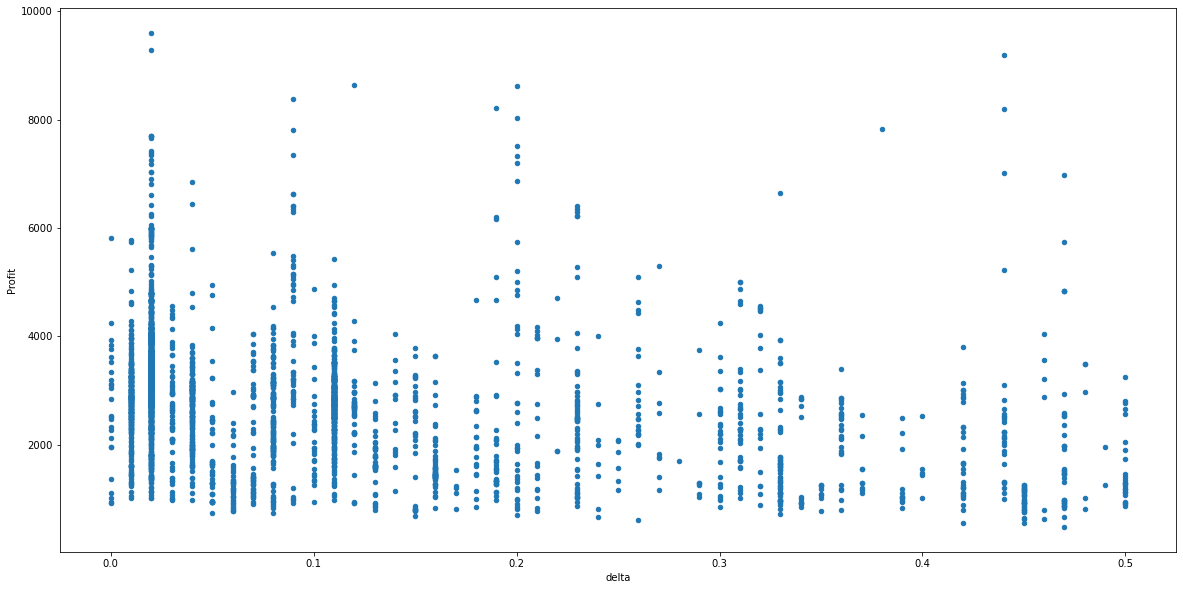

In [27]:
S_2015W41[S_2015W41["Result"]>=1].plot(y="Profit",x="delta",kind="scatter",figsize=(20, 10))


<AxesSubplot:xlabel='RR ratio', ylabel='Profit %'>

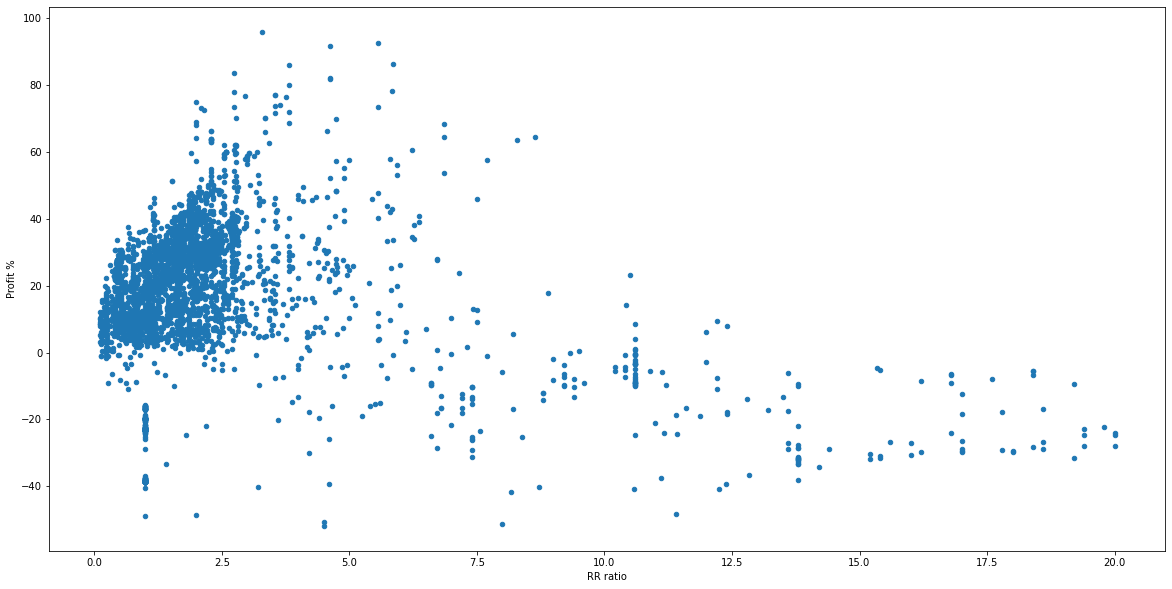

In [7]:
S_2015W41.plot(x="RR ratio",y="Profit %",kind="scatter",figsize=(20, 10))

<AxesSubplot:>

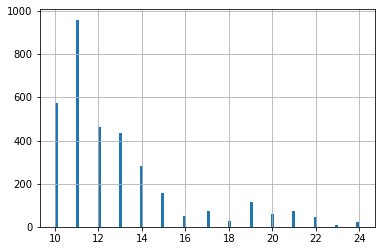

In [20]:
S_2015W41[S_2015W41["Result"]>=1]["slowEMAPeriod"].hist(bins=100)

<AxesSubplot:>

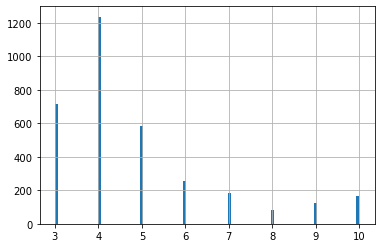

In [23]:
S_2015W41[S_2015W41["Result"]>=1]["fastEmaPeriod"].hist(bins=100)

<AxesSubplot:>

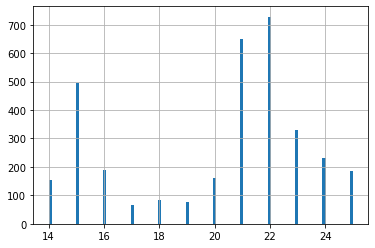

In [18]:
S_2015W41[S_2015W41["Result"]>=1]["atrPeriod"].hist(bins=100)

<AxesSubplot:xlabel='atrPeriod', ylabel='Result'>

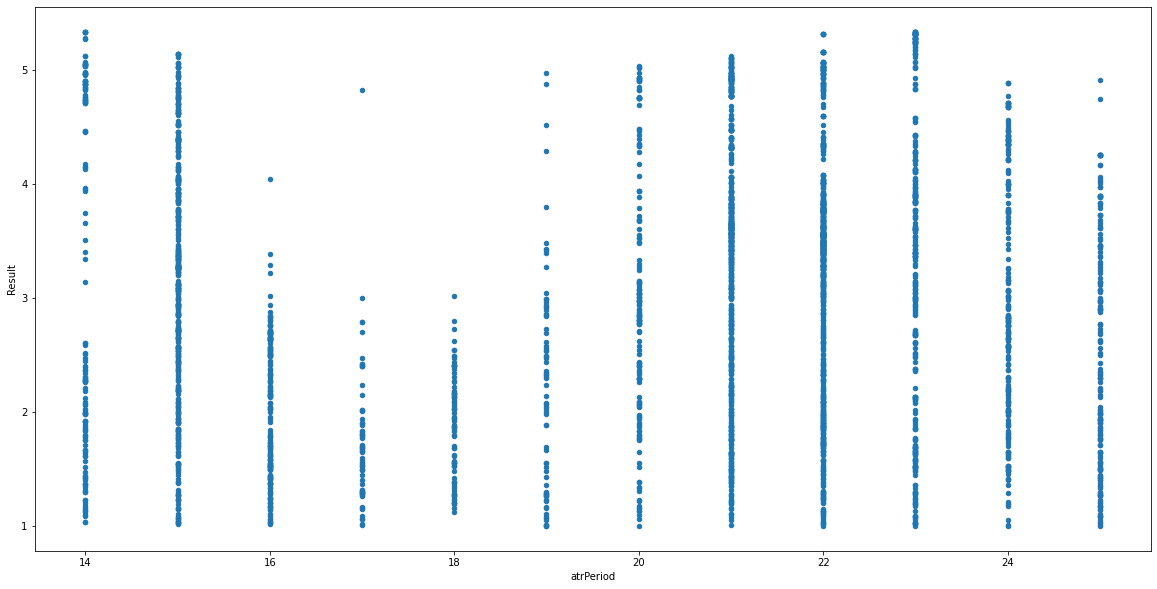

In [19]:
S_2015W41[S_2015W41["Result"]>=1].plot(x="atrPeriod",y="Result",kind="scatter",figsize=(20, 10))


In [9]:
S_2015W41.describe()

,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Equity DD %,Trades,SlFactor,TpFactor,atrPeriod,delta,option,fastEmaPeriod,slowEMAPeriod,vwapZoneMultiplyer,RR ratio,Profit %
count,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000
mean,2.296249,2017.295749,33.568416,3.355449,2.296313,11.258424,12.023086,106.078338,3.274478,5.701975,19.745005,0.131231,0.987738,5.273388,13.839010,4.277929,2.181699,20.172957
std,1.690167,2037.660074,26.621140,2.143350,1.690241,7.596645,9.439646,80.726702,1.336790,2.821801,3.476753,0.141873,0.594344,2.107428,3.766669,2.396995,2.367995,20.376601
min,-0.960000,-5194.990000,-28.282428,0.170141,-0.958887,-5.000000,4.017500,36.000000,0.500000,0.500000,14.000000,0.000000,0.000000,3.000000,10.000000,2.000000,0.113636,-51.949900
25%,1.050000,1077.825000,11.949881,1.515787,1.051201,7.080598,6.481600,53.000000,2.500000,3.800000,16.000000,0.020000,1.000000,4.000000,11.000000,2.000000,1.090909,10.778250
50%,2.410000,2525.540000,32.068124,2.698570,2.413694,13.518931,7.906600,66.000000,3.700000,6.000000,21.000000,0.080000,1.000000,4.000000,13.000000,3.000000,1.716117,25.255400
75%,3.610000,3256.565000,55.760027,5.283817,3.606777,16.846088,12.632550,127.000000,4.300000,7.400000,22.000000,0.210000,1.000000,7.000000,16.000000,6.000000,2.181818,32.565650
max,5.330000,9598.130000,90.811176,8.637513,5.331191,22.671761,67.314200,515.000000,5.000000,10.000000,25.000000,0.500000,2.000000,10.000000,24.000000,10.000000,20.000000,95.981300


In [10]:
S_2015W41_result_condition=S_2015W41[S_2015W41["Result"]>=0]
S_2015W41_result_condition.describe()

,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Equity DD %,Trades,SlFactor,TpFactor,atrPeriod,delta,option,fastEmaPeriod,slowEMAPeriod,vwapZoneMultiplyer,RR ratio,Profit %
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,2.691120,2594.158705,39.212754,3.702909,2.691226,13.334774,9.241461,83.560360,3.625946,6.095109,20.022909,0.118430,0.987645,5.114801,13.419048,4.480051,1.829610,25.941587
std,1.379454,1296.956875,23.010254,2.044816,1.379457,5.344452,4.999926,52.051827,0.972795,2.544609,3.340178,0.135752,0.573938,2.031599,3.503485,2.371068,1.084028,12.969569
min,0.000000,-19.900000,-0.086522,0.998523,-0.003261,-0.035110,4.017500,36.000000,0.500000,0.500000,14.000000,0.000000,0.000000,3.000000,10.000000,2.000000,0.113636,-0.199000
25%,1.570000,1595.810000,18.750727,1.796036,1.566888,9.151384,6.326100,52.000000,3.100000,4.200000,16.000000,0.020000,1.000000,4.000000,11.000000,2.000000,1.238095,15.958100
50%,2.730000,2740.250000,39.436667,3.229302,2.733110,14.604566,7.417600,62.000000,3.800000,6.600000,21.000000,0.050000,1.000000,4.000000,12.000000,4.000000,1.739130,27.402500
75%,3.720000,3354.080000,57.702911,5.578072,3.718877,17.250343,10.276400,100.000000,4.400000,7.600000,22.000000,0.160000,1.000000,6.000000,15.000000,6.000000,2.173913,33.540800
max,5.330000,9598.130000,90.811176,8.637513,5.331191,22.671761,43.211300,515.000000,5.000000,10.000000,25.000000,0.500000,2.000000,10.000000,24.000000,10.000000,12.400000,95.981300


S_2015W41_result_condition=S_2015W41[S_2015W41["Result"]>=1]

S_2015W41_result_condition.describe()

In [11]:
Grouped_S_2015W41=S_2015W41_result_condition.groupby("Profit")
Grouped_S_2015W41=Grouped_S_2015W41.agg({'Result':np.mean, 
                       'Expected Payoff':np.mean, 
                       'Profit Factor':np.mean,
                       'Recovery Factor':np.mean, 
                       'Sharpe Ratio':np.mean, 
                       'Equity DD %':np.mean, 
                       'Trades': lambda x: stats.mode(x)[0][0], 
                       'SlFactor':np.mean,
                       'TpFactor':np.mean, 
                       'atrPeriod':lambda x: stats.mode(x)[0][0], 
                       'delta':np.mean, 
                       'option':lambda x: stats.mode(x)[0][0], 
                       'fastEmaPeriod':lambda x: stats.mode(x)[0][0],
                       'slowEMAPeriod':lambda x: stats.mode(x)[0][0], 
                       'vwapZoneMultiplyer':lambda x: stats.mode(x)[0][0], 
                       'RR ratio':np.mean})


In [12]:
Grouped_S_2015W41

,Result,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Equity DD %,Trades,SlFactor,TpFactor,atrPeriod,delta,option,fastEmaPeriod,slowEMAPeriod,vwapZoneMultiplyer,RR ratio
Profit,,,,,,,,,,,,,,,,
-19.90,0.00,-0.086522,0.998523,-0.003261,-0.035110,39.0165,230,0.9,8.4,20,0.02,0,4,24,5,9.333333
2.06,0.00,0.018727,1.000866,0.001565,0.014925,13.1084,110,3.1,2.4,18,0.44,1,6,15,8,0.774194
12.85,0.01,0.162658,1.008322,0.010441,0.074628,11.7933,79,3.2,7.2,24,0.34,2,7,17,10,2.250000
37.26,0.01,0.102928,1.002913,0.012505,0.157832,24.3586,362,0.5,1.3,20,0.19,1,3,19,2,2.600000
44.11,0.02,0.373814,1.012932,0.021013,0.223587,20.7876,118,2.1,4.9,25,0.24,1,4,20,2,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8617.13,2.31,53.857062,1.944868,2.313311,14.120693,21.1653,160,1.7,6.5,19,0.20,0,3,12,3,3.823529
8640.30,1.20,37.242672,1.512555,1.195142,9.841483,32.1610,232,1.3,7.6,18,0.12,0,7,11,8,5.846154
9186.61,1.63,42.530602,1.635937,1.632627,11.951647,28.7455,216,1.3,6.0,16,0.44,0,3,13,5,4.615385


In [ ]:
"""Resumen de una muestra, trabajaremos con los valores de laz medias , varianza , percentiles y modas, condicionadas a al recovery factor mayor a uno




"""